# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from pandas.core.common import SettingWithCopyWarning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline
sns.set_style('darkgrid')
pd.set_option("max.columns", 1000)
pd.set_option("display.max_rows", 1000)
warnings.simplefilter('error', SettingWithCopyWarning)

# Load Data

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1', parse_dates = ['creation_time'])
users_eng = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1', parse_dates = ['time_stamp'])

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users.shape

(12000, 10)

In [5]:
users_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
users_eng.shape

(207917, 3)

# Data Wrangling

### Rename 'object_id' column name as 'user_id'

In [7]:
users.rename(columns = {'object_id':'user_id'}, inplace = True)
users.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

### Merge Dataframes

In [8]:
df = pd.merge(users, users_eng, on = 'user_id', how = 'inner')

In [9]:
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'], unit = 's')
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,1


### Explore data

In [10]:
df.shape

(207917, 12)

In [11]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     207917 non-null  int64         
 1   creation_time               207917 non-null  datetime64[ns]
 2   name                        207917 non-null  object        
 3   email                       207917 non-null  object        
 4   creation_source             207917 non-null  object        
 5   last_session_creation_time  207917 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    207917 non-null  int64         
 7   enabled_for_marketing_drip  207917 non-null  int64         
 8   org_id                      207917 non-null  int64         
 9   invited_by_user_id          116887 non-null  float64       
 10  time_stamp                  207917 non-null  datetime64[ns]
 11  visited                     207917 non-

In [13]:
df.describe()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
count,207917.000000,207917.000000,207917.000000,207917.000000,116887.000000,207917.0
mean,5913.314197,0.258137,0.154533,164.315895,5972.167555,1.0
std,3394.941674,0.437611,0.361460,121.165846,3247.095621,0.0
min,1.000000,0.000000,0.000000,0.000000,3.000000,1.0
25%,3087.000000,0.000000,0.000000,60.000000,3269.000000,1.0
50%,5682.000000,0.000000,0.000000,145.000000,5972.000000,1.0
75%,8944.000000,1.000000,0.000000,260.000000,8513.000000,1.0
max,12000.000000,1.000000,1.000000,416.000000,11999.000000,1.0


### Check for missing values

In [14]:
df.isnull().sum()

user_id                           0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            91030
time_stamp                        0
visited                           0
dtype: int64

### Drop missing values

In [15]:
df.drop(['invited_by_user_id'], axis = 1, inplace = True)
df.isnull().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
time_stamp                    0
visited                       0
dtype: int64

### Organize Data

 Count number of logins by each user

In [16]:
df['logins'] = df.groupby('user_id')['user_id'].transform('count')

In [17]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,time_stamp,visited,logins
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,2014-04-22 03:53:30,1,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-11-15 03:45:04,1,14
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-11-29 03:45:04,1,14
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-12-09 03:45:04,1,14
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-12-25 03:45:04,1,14


Sort df by 'user_id' and 'time_stamp'

In [18]:
df = df.sort_values(['user_id', 'time_stamp'])

In [19]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,time_stamp,visited,logins
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,2014-04-22 03:53:30,1,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-11-15 03:45:04,1,14
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-11-29 03:45:04,1,14
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-12-09 03:45:04,1,14
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-12-25 03:45:04,1,14


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     207917 non-null  int64         
 1   creation_time               207917 non-null  datetime64[ns]
 2   name                        207917 non-null  object        
 3   email                       207917 non-null  object        
 4   creation_source             207917 non-null  object        
 5   last_session_creation_time  207917 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    207917 non-null  int64         
 7   enabled_for_marketing_drip  207917 non-null  int64         
 8   org_id                      207917 non-null  int64         
 9   time_stamp                  207917 non-null  datetime64[ns]
 10  visited                     207917 non-null  int64         
 11  logins                      207917 non-

Count user engagement based on 1 week interval

In [21]:
hits = df.groupby(['user_id', df['time_stamp'].dt.floor('7D')]).size().reset_index(name = 'count')
hits.value_counts()

user_id  time_stamp  count
12000    2014-01-23  1        1
4017     2013-03-07  4        1
         2013-06-20  2        1
         2013-06-13  4        1
         2013-06-06  4        1
                             ..
7979     2012-12-20  2        1
         2012-11-22  1        1
         2012-11-15  1        1
         2012-11-08  1        1
1        2014-04-17  1        1
Length: 68445, dtype: int64

Check for user logins on same day

In [22]:
df['diff_weeks'] = df.groupby('user_id')['time_stamp'].diff().dt.days
df[df['diff_weeks'] == 0.0]

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,time_stamp,visited,logins,diff_weeks


Extract the users that loggedin three separate days in at least one sevenday period

In [23]:
users_adopted = hits[hits['count']>=3].groupby('user_id')['count'].sum().reset_index(name = 'count')
users_adopted = users_adopted.assign(adopted = 1)
users_adopted.head()

,user_id,count,adopted
0,10,257,1
1,42,321,1
2,43,4,1
3,53,3,1
4,63,348,1


In [24]:
df['adopted']=df['user_id'].map(dict(zip(users_adopted['user_id'],users_adopted['adopted'])))

In [25]:
df = df.fillna(0)
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,time_stamp,visited,logins,diff_weeks,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,2014-04-22 03:53:30,1,1,0.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-11-15 03:45:04,1,14,0.0,0.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-11-29 03:45:04,1,14,14.0,0.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-12-09 03:45:04,1,14,10.0,0.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-12-25 03:45:04,1,14,16.0,0.0


In [26]:
df = df.drop(['visited', 'diff_weeks'], axis = 1)

# EDA

<AxesSubplot:xlabel='creation_source', ylabel='count'>

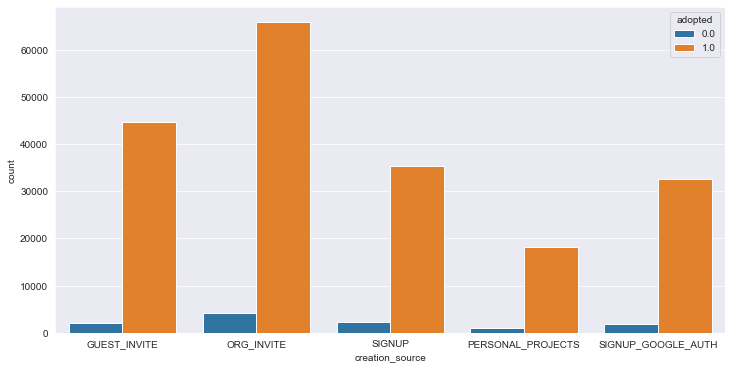

In [27]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'creation_source', hue = 'adopted')

<AxesSubplot:xlabel='opted_in_to_mailing_list', ylabel='count'>

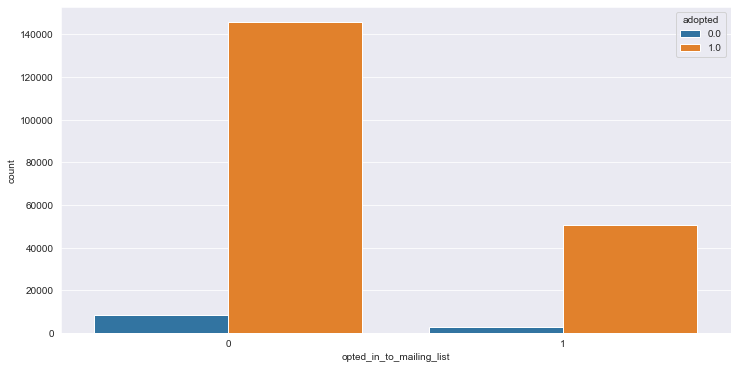

In [28]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'opted_in_to_mailing_list', hue = 'adopted')

<AxesSubplot:xlabel='enabled_for_marketing_drip', ylabel='count'>

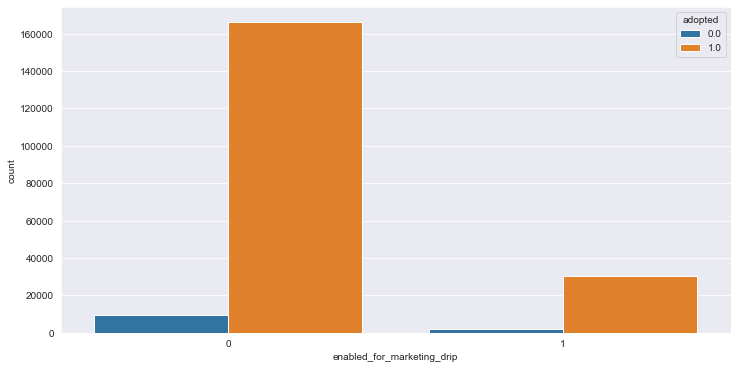

In [29]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'enabled_for_marketing_drip', hue = 'adopted')

<AxesSubplot:>

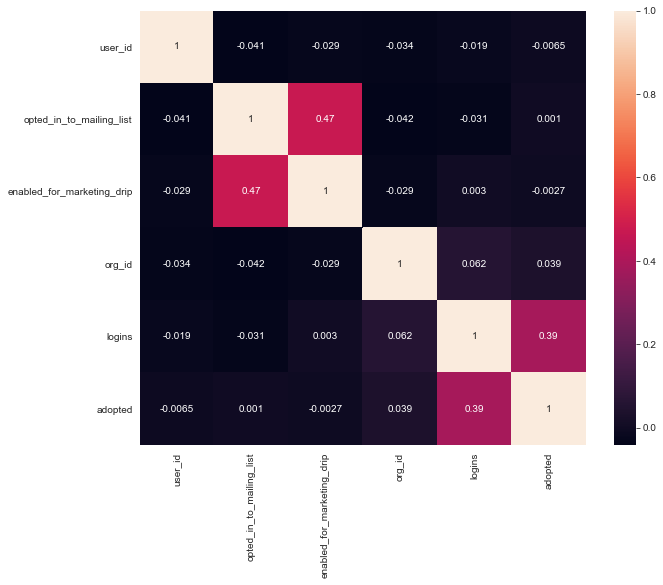

In [30]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)

# Feature Engineering

### One Hot Encoder

In [31]:
dummies = pd.get_dummies(df['creation_source'])

In [32]:
dummies.head()

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [33]:
df = pd.concat([df, dummies], axis = 1)
df = df.drop('creation_source', axis = 1)

In [34]:
df.head()

,user_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,time_stamp,logins,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,2014-04-22 03:53:30,1,0.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,2013-11-15 03:45:04,14,0.0,0,1,0,0,0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,2013-11-29 03:45:04,14,0.0,0,1,0,0,0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,2013-12-09 03:45:04,14,0.0,0,1,0,0,0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,2013-12-25 03:45:04,14,0.0,0,1,0,0,0


### Train Test Split

In [35]:
X = df.drop(['adopted', 'name', 'email', 'creation_time', 'last_session_creation_time', 'time_stamp', 'logins'], axis = 1)
y = df['adopted']

In [36]:
y.value_counts(normalize = True)

1.0    0.944593
0.0    0.055407
Name: adopted, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Logistic Regression

In [38]:
lr = LogisticRegression(max_iter = 1000, class_weight = 'balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [39]:
y_pred = lr.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.07      0.57      0.12      2896
         1.0       0.95      0.54      0.69     49084

    accuracy                           0.54     51980
   macro avg       0.51      0.55      0.41     51980
weighted avg       0.91      0.54      0.66     51980



In [41]:
confusion_matrix(y_test, y_pred)

array([[ 1642,  1254],
       [22612, 26472]], dtype=int64)

### Random forest Classifier

In [42]:
rf = RandomForestClassifier(max_depth=10, class_weight = 'balanced', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [43]:
y_pred = rf.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.31      0.73      0.44      2896
         1.0       0.98      0.91      0.94     49084

    accuracy                           0.90     51980
   macro avg       0.65      0.82      0.69     51980
weighted avg       0.95      0.90      0.91     51980



In [45]:
confusion_matrix(y_test, y_pred)

array([[ 2118,   778],
       [ 4637, 44447]], dtype=int64)

In [46]:
importances = rf.feature_importances_
rf_importances = pd.Series(importances, index=X_train.columns)

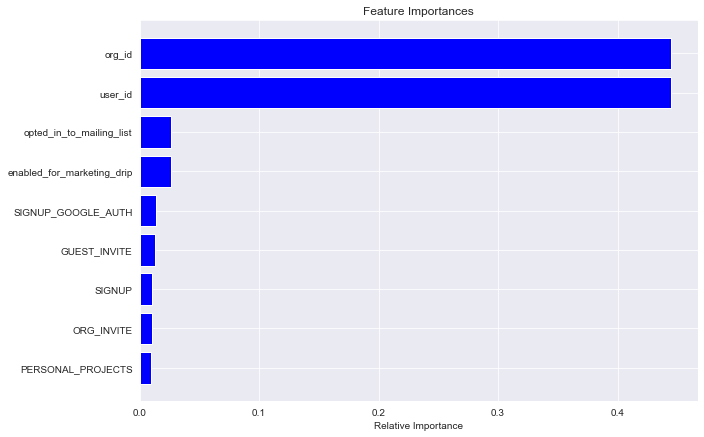

In [47]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

'org_id' and user_id' are the most important features as per rf model